In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

**Задание 0**

In [ ]:
sigma = 15
delta = 3
n = int((sigma*sp.norm().ppf(0.975)/delta)**2)
print(f'n = {n}')

n = 96


**Задание 1**

In [ ]:
def get_interval(N, sigma, x_mean):
  return (x_mean - (sigma*sp.norm().ppf(0.99))/np.sqrt(N)), (x_mean + (sigma*sp.norm().ppf(0.99))/np.sqrt(N))

In [ ]:
a, b = get_interval(25, 15, 130)
int(b-a)

13

**Задание 2**

In [ ]:
def t_student(arr_1, arr_2):
  n_1 = len(arr_1)
  n_2 = len(arr_2)
  mean_1 = np.mean(arr_1)
  mean_2 = np.mean(arr_2)
  s_1 = np.std(arr_1, ddof = 1)
  s_2 = np.std(arr_2, ddof = 1)
  return (mean_1-mean_2)/(np.sqrt((s_1**2)/n_1+(s_2**2)/n_2))

In [ ]:
# H0 - выборки статистически неразличимы
# H1 - выборки статистически различимы

population_men  = sp.norm.rvs(loc=171, scale=19, size=1200000)  # Выборка мужчин со средним ростом 171
population_women = sp.norm.rvs(loc=165, scale=16, size=1200000)  # Выборка женщин со средним ростом 165

print(t_student(population_men, population_women))
t, p = sp.ttest_ind(a=population_men, b=population_women, equal_var=False)
print (f'{t}, {p}')

263.09700020886834
263.09700020886834, 0.0


(array([1.01000e+02, 3.22900e+03, 3.73790e+04, 1.85584e+05, 4.02397e+05,
        3.82437e+05, 1.57992e+05, 2.85520e+04, 2.25100e+03, 7.80000e+01]),
 array([ 90.40705464, 105.52154071, 120.63602679, 135.75051286,
        150.86499893, 165.979485  , 181.09397107, 196.20845714,
        211.32294322, 226.43742929, 241.55191536]),
 <a list of 10 Patch objects>)

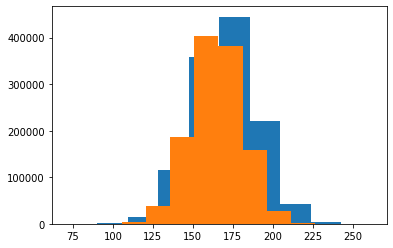

In [ ]:
plt.hist(population_men, 10)
plt.hist(population_women, 10)
# Большое значение t и нулевое значение p говорят о том, что распределения роста 
# мужчин и женщин различны (различные средние и дисперсии) и различие статистически значимо

**Задание 3**

In [ ]:
sigma = 150
delta = 50
n = int((sigma*sp.norm().ppf(0.975)/delta)**2)
print(f'Объем выборки для исследования среднего чека за кофе: n = {n}')

Объем выборки для исследования среднего чека за кофе: n = 34


**Задание 4**

In [ ]:
alpha = 0.05
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [ ]:
chi, pval, dof, exp = sp.chi2_contingency(observations)
critical_value = sp.chi2.ppf(0.95, dof)  
print('p-value is: ', pval)
#print('chi is: ', chi)
#print('critical_value is: ', critical_value)

print(f'{pval > alpha}')
# значение p больше уровня значимости 0.05, следовательно принимаем нулевую гипотезу, что
# ответы волшебника случайны

p-value is:  0.35396880166541644
True


**Задание 5**

In [ ]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), sp.sem(data)
    h = se * sp.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h

In [ ]:
beta = 0.9
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
mean_confidence_interval(data, beta)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

**Задание 6**

In [ ]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]
# Гипотеза H0 - выборки принадлежат одному распределению
# Гипотеза H1 - выборки не принадлежат одному распределению

In [ ]:
t, p = sp.ttest_ind(a=data_1, b=data_2, equal_var=False)
print (f'{t}, {p}')

N = len(data_1) + len(data_2) - 2
t_ctrl = sp.t.ppf(0.9995, N) # рассчитаем критическое значение t, с N1 + N2 - 2 степенями свободы и уровне значимости 0.001
print(f't_ctrl = {t_ctrl}')

7.068404675178226, 2.4974180382616264e-09
t_ctrl = 3.3694197811539053


(array([1., 0., 0., 0., 2., 6., 7., 7., 6., 6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

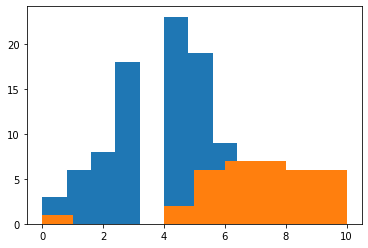

In [ ]:
# C учетом того, что p < уровня значимости, а t > t_ctrl, то принимаем гипотезу H1 - что выборки не принадлежат одному распределению
plt.hist(data_2, bins=10)
plt.hist(data_1, bins=10)

**Задание 7**

In [ ]:
# H0 - распределение нормальное
# H1 - распределение ненормальное
# p-value = 0.03

url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.dropna(how='any',inplace=True)

In [ ]:
df[df.price<500].shape[0]

38085

In [ ]:
mn = df[df.price<500].price.mean()
sigma = df[df.price<500].price.std()

gen = sp.norm.rvs(loc=mn, scale=sigma, size=df[df.price<500].shape[0])
# С помощью критерия хи-квадрат проверим, является ли рапределение цен на недвижимость нормальным

sp.chisquare(df[df.price<500]['price'], f_exp=gen)

Power_divergenceResult(statistic=25361593.554194514, pvalue=0.0)

In [ ]:
# Получаем, что pvalue = 0.0 меньше заданного уровня значимости = 0.03
# Значит, вероятность того, что наше распределение цен на недвижимость подчиняется нормальному закону, 
# а имеющиеся данные обусловлены случайностью - равна 0, что меньше допустимого порога в 3%
# Следовательно, гипотезу H0 о принадлежности распределения к нормальному распределению мы можем смело отметать

**Задание 8**

In [ ]:
np.random.seed(11)
A = sp.norm.rvs(scale=15,loc=169,size=300)
B = sp.norm.rvs(scale=14,loc=171.4,size=300)
p_value = 0.05

In [ ]:
t, p = sp.ttest_ind(a=A, b=B, equal_var=False)
print (f'{t}, {p}')

-1.95300880485141, 0.051284961272800134


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  3.,  4.,  2.,  4.,
         5., 10., 10.,  9., 12.,  5., 14., 17., 27., 14., 18., 12., 21.,
        14., 22.,  9.,  8., 10., 11., 10.,  5.,  6.,  2.,  2.,  3.,  2.,
         3.]), array([122.95604119, 125.01444161, 127.07284203, 129.13124245,
        131.18964287, 133.24804329, 135.30644371, 137.36484413,
        139.42324455, 141.48164497, 143.54004539, 145.59844581,
        147.65684623, 149.71524665, 151.77364707, 153.8320475 ,
        155.89044792, 157.94884834, 160.00724876, 162.06564918,
        164.1240496 , 166.18245002, 168.24085044, 170.29925086,
        172.35765128, 174.4160517 , 176.47445212, 178.53285254,
        180.59125296, 182.64965338, 184.7080538 , 186.76645422,
        188.82485464, 190.88325507, 192.94165549, 195.00005591,
        197.05845633, 199.11685675, 201.17525717, 203.23365759,
        205.29205801]), <a list of 40 Patch objects>)

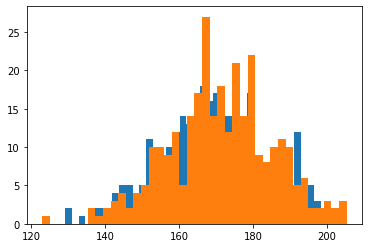

In [ ]:
# полученное значение p чуть больше p_value, а, значит, формально выборки статистически одинаковы
# при p_value = 0.052 уже можно было бы считать, что выборки различны
plt.hist(A, 40)
plt.hist(B, 40)